In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping

In [2]:
X = np.load("/kaggle/input/60x60-npy-dataset/pixel_value_array.npy")
Y = np.load("/kaggle/input/60x60-npy-dataset/label.npy")

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=7)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=8)
del X
del Y

In [5]:
model = Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="same", activation="relu", input_shape=(60,60,3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
print("Output: ", model.output_shape)
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
print("Output: ", model.output_shape)
model.add(Flatten())
print("Output: ", model.output_shape)
model.add(Dense(units=1000,activation="relu"))
print("Output: ", model.output_shape)
model.add(Dropout(0.4))
print("Output: ", model.output_shape)
model.add(Dense(units=100,activation="relu"))
print("Output: ", model.output_shape)
model.add(Dense(units=2, activation="softmax"))
print("Output: ", model.output_shape)

2022-04-17 16:36:58.211664: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Input:  (None, 60, 60, 3)
Output:  (None, 60, 60, 8)
Output:  (None, 60, 60, 8)
Output:  (None, 30, 30, 8)
Output:  (None, 30, 30, 16)
Output:  (None, 30, 30, 16)
Output:  (None, 15, 15, 16)
Output:  (None, 15, 15, 32)
Output:  (None, 15, 15, 32)
Output:  (None, 15, 15, 32)
Output:  (None, 7, 7, 32)
Output:  (None, 7, 7, 64)
Output:  (None, 7, 7, 64)
Output:  (None, 7, 7, 64)
Output:  (None, 3, 3, 64)
Output:  (None, 3, 3, 64)
Output:  (None, 3, 3, 64)
Output:  (None, 3, 3, 64)
Output:  (None, 1, 1, 64)
Output:  (None, 64)
Output:  (None, 1000)
Output:  (None, 1000)
Output:  (None, 100)
Output:  (None, 2)


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 32)        4

In [7]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [8]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=15,verbose=1,restore_best_weights=True, mode='min')

In [9]:
batch_size=150
epochs=50
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_test, Y_test), verbose = 2, callbacks=[early_stopping])

2022-04-17 16:37:12.663496: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
57/57 - 13s - loss: 0.6397 - accuracy: 0.6222 - val_loss: 0.5542 - val_accuracy: 0.7642
Epoch 2/50
57/57 - 12s - loss: 0.5340 - accuracy: 0.7594 - val_loss: 0.5312 - val_accuracy: 0.7595
Epoch 3/50
57/57 - 11s - loss: 0.5195 - accuracy: 0.7670 - val_loss: 0.5677 - val_accuracy: 0.7522
Epoch 4/50
57/57 - 12s - loss: 0.4961 - accuracy: 0.7830 - val_loss: 0.4788 - val_accuracy: 0.7963
Epoch 5/50
57/57 - 11s - loss: 0.4808 - accuracy: 0.7947 - val_loss: 0.4748 - val_accuracy: 0.7996
Epoch 6/50
57/57 - 11s - loss: 0.4738 - accuracy: 0.7987 - val_loss: 0.4893 - val_accuracy: 0.7936
Epoch 7/50
57/57 - 12s - loss: 0.4759 - accuracy: 0.7978 - val_loss: 0.4770 - val_accuracy: 0.7909
Epoch 8/50
57/57 - 11s - loss: 0.4697 - accuracy: 0.8004 - val_loss: 0.4479 - val_accuracy: 0.8143
Epoch 9/50
57/57 - 11s - loss: 0.4556 - accuracy: 0.8072 - val_loss: 0.4489 - val_accuracy: 0.8069
Epoch 10/50
57/57 - 12s - loss: 0.4528 - accuracy: 0.8097 - val_loss: 0.4447 - val_accuracy: 0.8130
Epoch 11/

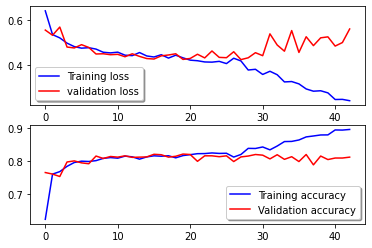

In [10]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [11]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1)
print(confusion_matrix(Y_true, Y_pred_classes))

[[1206  294]
 [ 185  810]]


In [12]:
score = metrics.precision_score(Y_true,Y_pred_classes, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(Y_true, Y_pred_classes, average= "weighted")
print("Recall score: {}".format(score))
score_f1 = metrics.f1_score(Y_true, Y_pred_classes, average= "weighted")
print("F1 score: {}".format(score_f1))

Precision score: 0.8138398432848568
Recall score: 0.8080160320641283
F1 score: 0.8093816402677982
